In [1]:
!kaggle datasets download -d noamsegal/affectnet-training-data

Dataset URL: https://www.kaggle.com/datasets/noamsegal/affectnet-training-data
License(s): Attribution-NonCommercial-ShareAlike 3.0 IGO (CC BY-NC-SA 3.0 IGO)
 97% 305M/314M [00:08<00:00, 33.9MB/s]
100% 314M/314M [00:08<00:00, 37.7MB/s]


In [2]:
!unzip /content/affectnet-training-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: sad/image0025659.jpg    
  inflating: sad/image0025666.jpg    
  inflating: sad/image0025673.jpg    
  inflating: sad/image0025679.jpg    
  inflating: sad/image0025681.jpg    
  inflating: sad/image0025693.jpg    
  inflating: sad/image0025694.jpg    
  inflating: sad/image0025697.jpg    
  inflating: sad/image0025715.jpg    
  inflating: sad/image0025725.jpg    
  inflating: sad/image0025726.jpg    
  inflating: sad/image0025730.jpg    
  inflating: sad/image0025736.jpg    
  inflating: sad/image0025753.jpg    
  inflating: sad/image0025760.jpg    
  inflating: sad/image0025761.jpg    
  inflating: sad/image0025769.jpg    
  inflating: sad/image0025774.jpg    
  inflating: sad/image0025787.jpg    
  inflating: sad/image0025808.jpg    
  inflating: sad/image0025822.jpg    
  inflating: sad/image0025834.jpg    
  inflating: sad/image0025835.jpg    
  inflating: sad/image0025843.jpg    
  inflating: sad/image0025845.jpg    

In [3]:
# Install necessary libraries
!pip install evaluate datasets transformers accelerate torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 656.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

# Load the labels.csv file
labels_df = pd.read_csv('/content/labels.csv')

# Create a dictionary to map label names to integers
label_to_int = {'anger': 0, 'sad': 1, 'disgust': 2, 'fear': 3, 'contempt': 4, 'happy': 5, 'neutral': 6, 'surprise': 7}

# Print the count of images for each emotion
print(labels_df['label'].value_counts())

# Convert the label column to integers
labels_df['label'] = labels_df['label'].map(label_to_int)

label
surprise    4616
happy       4336
anger       3608
disgust     3472
contempt    3244
fear        3043
sad         2995
neutral     2861
Name: count, dtype: int64


In [7]:
# Convert the label column to integers
labels_df['label'] = labels_df['label'].map(label_to_int)

# Create a list to store the image paths and corresponding labels
image_paths = []
labels = []

# Iterate over the rows in the labels_df
for index, row in labels_df.iterrows():
    image_path = os.path.join('/content', row['pth'])
    label = row['label']
    image_paths.append(image_path)
    labels.append(label)

# Load the images and resize them to a fixed size (e.g. 224x224)
image_size = (224, 224)
images = []
for image_path in image_paths:
    image = cv2.imread(image_path)
    image = cv2.resize(image, image_size)
    images.append(image)




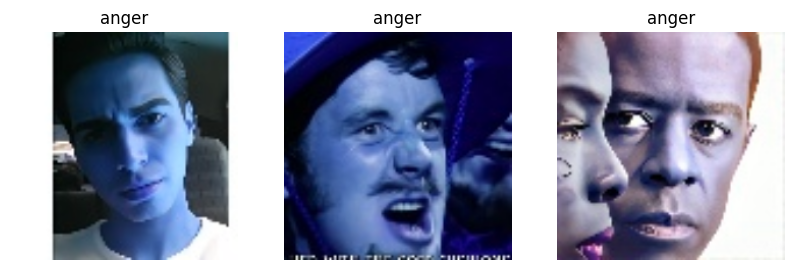

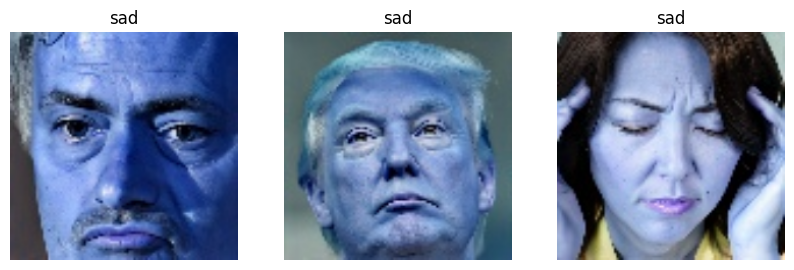

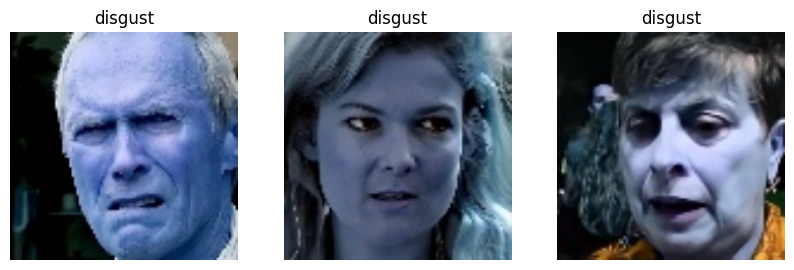

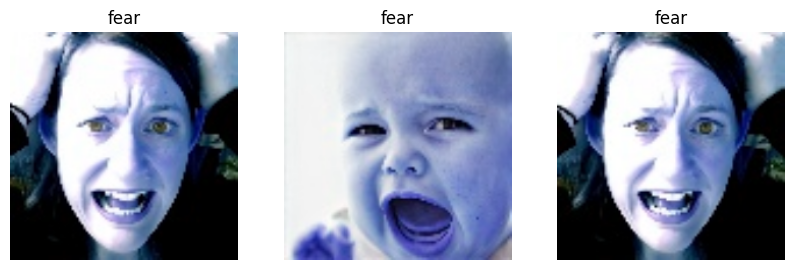

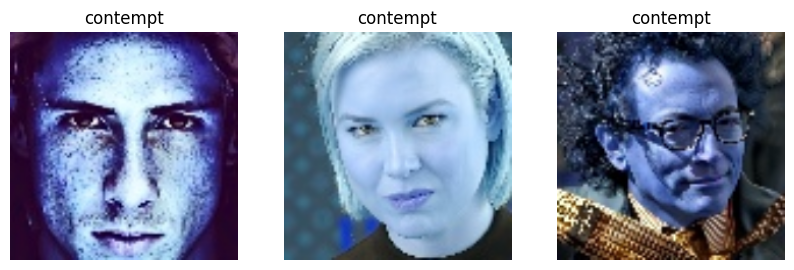

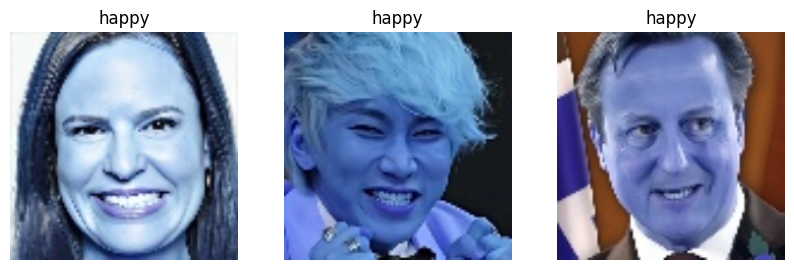

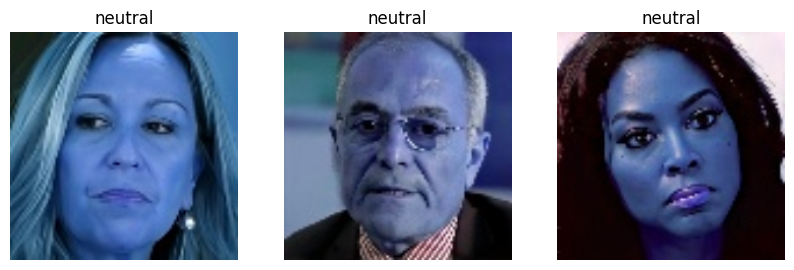

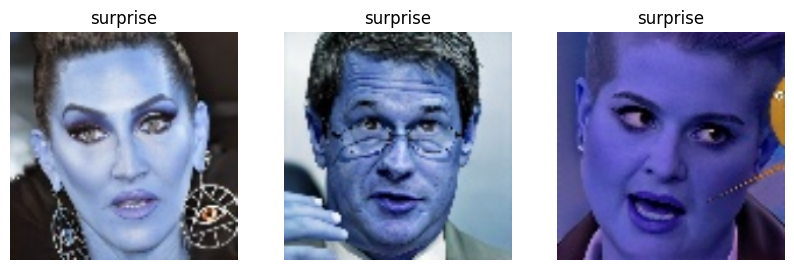

In [ ]:
# Display 3 images of each emotion
emotions = ['anger', 'sad', 'disgust', 'fear', 'contempt', 'happy', 'neutral', 'surprise']
for emotion in emotions:
    emotion_images = [image for image, label in zip(images, labels) if label == label_to_int[emotion]]
    plt.figure(figsize=(10, 10))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(emotion_images[i])
        plt.title(emotion)
        plt.axis('off')
    plt.show()

label
surprise    4616
happy       4336
anger       3608
disgust     3472
contempt    3244
fear        3043
sad         2995
neutral     2861
Name: count, dtype: int64


Map:   0%|          | 0/28175 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/28175 [00:00<?, ? examples/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Size:  224


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


85.804808


Epoch,Training Loss,Validation Loss,Accuracy
1,1.364900,1.000356,0.642236
2,0.989300,0.872561,0.680923
3,0.749200,0.820268,0.694232
4,0.633400,0.767937,0.715883


Epoch,Training Loss,Validation Loss,Accuracy
1,1.364900,1.000356,0.642236
2,0.989300,0.872561,0.680923
3,0.749200,0.820268,0.694232
4,0.633400,0.767937,0.715883
5,0.482600,0.752679,0.724046


{'test_loss': 0.7526791095733643, 'test_accuracy': 0.7240461401952085, 'test_runtime': 68.6681, 'test_samples_per_second': 82.061, 'test_steps_per_second': 10.267}
Accuracy: 0.7240
F1 Score: 0.7118


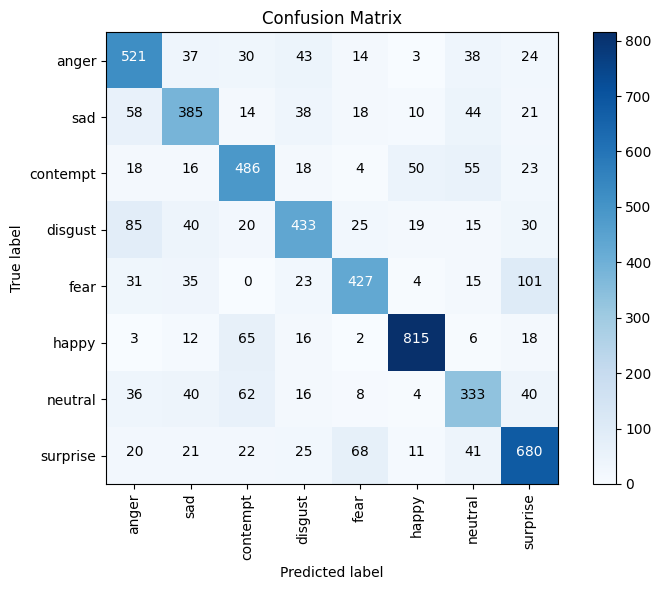


Classification report:

              precision    recall  f1-score   support

       anger     0.6749    0.7338    0.7031       710
         sad     0.6570    0.6548    0.6559       588
    contempt     0.6953    0.7254    0.7100       670
     disgust     0.7075    0.6492    0.6771       667
        fear     0.7544    0.6714    0.7105       636
       happy     0.8897    0.8698    0.8797       937
     neutral     0.6088    0.6178    0.6133       539
    surprise     0.7257    0.7658    0.7452       888

    accuracy                         0.7240      5635
   macro avg     0.7142    0.7110    0.7118      5635
weighted avg     0.7257    0.7240    0.7241      5635



In [4]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import warnings
from datasets import Dataset as HFDataset, Image as HFImage, ClassLabel
from transformers import (
    TrainingArguments,
    Trainer,
    ViTImageProcessor,
    ViTForImageClassification,
    DefaultDataCollator,
    pipeline
)
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import (
    CenterCrop,
    Compose,
    Normalize,
    RandomRotation,
    RandomResizedCrop,
    RandomHorizontalFlip,
    RandomAdjustSharpness,
    Resize,
    ToTensor
)
from PIL import ImageFile, Image
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    f1_score
)
import itertools
import evaluate

warnings.filterwarnings("ignore")

ImageFile.LOAD_TRUNCATED_IMAGES = True

# Load the labels.csv file
labels_df = pd.read_csv('/content/labels.csv')

# Create a dictionary to map label names to integers
label_to_int = {'anger': 0, 'sad': 1, 'disgust': 2, 'fear': 3, 'contempt': 4, 'happy': 5, 'neutral': 6, 'surprise': 7}

# Print the count of images for each emotion
print(labels_df['label'].value_counts())

# Convert the label column to integers
labels_df['label'] = labels_df['label'].map(label_to_int)

# Load labels from CSV
labels_df = pd.read_csv('/content/labels.csv')

# Define the list of unique labels
labels_list = ['anger', 'sad', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'surprise']

# Initialize dictionaries to map labels to IDs and vice versa
label2id, id2label = dict(), dict()
for i, label in enumerate(labels_list):
    label2id[label] = i
    id2label[i] = label

# Creating ClassLabel to match labels to IDs
ClassLabels = ClassLabel(num_classes=len(labels_list), names=labels_list)

# Mapping labels to IDs If an example has a label 'anger', ClassLabels.str2int('anger') will convert it to the corresponding ID, for example 0.
def map_label2id(example):
    example['label'] = ClassLabels.str2int(example['label'])
    return example

# Create datasets from pandas dataframes
train_dataset = HFDataset.from_pandas(labels_df)

# Apply label mapping
train_dataset = train_dataset.map(map_label2id, batched=True)

# Cast label column to ClassLabel Object represented as categorical variables (with integer IDs corresponding to the class names).
train_dataset = train_dataset.cast_column('label', ClassLabels)

# Define the pre-trained ViT model string
model_str = "google/vit-base-patch16-224-in21k"

# Create a processor for ViT model input from the pre-trained model
processor = ViTImageProcessor.from_pretrained(model_str)

# Retrieve the image mean and standard deviation used for normalization
image_mean, image_std = processor.image_mean, processor.image_std

# Get the size (height) of the ViT model's input images
size = processor.size["height"]
print("Size: ", size)

# Define a normalization transformation for the input images
normalize = Normalize(mean=image_mean, std=image_std)

# Define a set of transformations for training data
_train_transforms = Compose(
    [
        Resize((size, size)),  # Resize images to the ViT model's input size
        RandomRotation(90),  # Apply random rotation 
        RandomAdjustSharpness(2),  # Adjust sharpness randomly
        RandomHorizontalFlip(0.5),  # Random horizontal flip
        ToTensor(),  # Convert images to tensors (required format for input into the model)
        normalize  # Normalize images using mean and std
    ]
)

# Define a set of transformations for validation data
_val_transforms = Compose(
    [
        Resize((size, size)),  # Resize images to the ViT model's input size
        ToTensor(),  # Convert images to tensors
        normalize  # Normalize images using mean and std
    ]
)

# Define a function to apply training transformations to a batch of examples
def train_transforms(examples):
    examples['pixel_values'] = [_train_transforms(Image.open(image_path).convert("RGB")) for image_path in examples['pth']]
    return examples

# Define a function to apply validation transformations to a batch of examples
def val_transforms(examples):
    examples['pixel_values'] = [_val_transforms(Image.open(image_path).convert("RGB")) for image_path in examples['pth']]
    return examples

# Split the dataset into training and validation
train_dataset = train_dataset.train_test_split(test_size=0.2)

# Set the transforms for the training data
train_dataset['train'] = train_dataset['train'].with_transform(train_transforms)

# Set the transforms for the validation data
train_dataset['test'] = train_dataset['test'].with_transform(val_transforms)

# Define a collate function that prepares batched data for model training.
def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example['label'] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

# Create a ViTForImageClassification model from a pretrained checkpoint with a specified number of output labels.
model = ViTForImageClassification.from_pretrained(model_str, num_labels=len(labels_list))

# Configure the mapping of class labels to their corresponding indices for later reference. step ensures that the model can output human-readable labels
model.config.id2label = id2label
model.config.label2id = label2id

# Calculate and print the number of trainable parameters in millions for the model.
print(model.num_parameters(only_trainable=True) / 1e6)

# Load the accuracy metric from a module named 'evaluate'
accuracy = evaluate.load("accuracy")

# Define a function 'compute_metrics' to calculate evaluation metrics. computes the evaluation metrics (accuracy) during model evaluation.
def compute_metrics(eval_pred):
    predictions = eval_pred.predictions
    label_ids = eval_pred.label_ids
    predicted_labels = predictions.argmax(axis=1)
    acc_score = accuracy.compute(predictions=predicted_labels, references=label_ids)['accuracy']
    return {"accuracy": acc_score}

# Define the name of the evaluation metric to be used during training and evaluation.
metric_name = "accuracy"

# Define the name of the model, which will be used to create a directory for saving model checkpoints and outputs.
model_name = "facial_emotions_image_detection"

# Define the number of training epochs for the model.
num_train_epochs = 5

# Create an instance of TrainingArguments to configure training settings. It controls several key settings for the training process.

args = TrainingArguments(
    output_dir=model_name,
    logging_dir='./logs',
    evaluation_strategy="epoch",
    learning_rate=1e-4,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=8,
    num_train_epochs=num_train_epochs,
    weight_decay=0.02,
    warmup_steps=50,
    remove_unused_columns=False,
    save_strategy='epoch',
    load_best_model_at_end=True,
    save_total_limit=1,
    report_to="none"
)

# Create a Trainer instance for fine-tuning the model. It handles the training and evaluation process for the model.

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset['train'],
    eval_dataset=train_dataset['test'],
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
)

# Evaluate the pre-training model's performance on a test dataset.
trainer.evaluate()

# Start training the model using the trainer object.
trainer.train()

# Evaluate the post-training model's performance on the validation or test dataset.
trainer.evaluate()

# Use the trained 'trainer' to make predictions on the 'test_dataset'.  predict the labels for the images in the validation set.

outputs = trainer.predict(train_dataset['test'])

# Print the metrics obtained from the prediction outputs.
print(outputs.metrics)

# Extract the true labels from the model outputs
y_true = outputs.label_ids

# Predict the labels by selecting the class with the highest probability
y_pred = outputs.predictions.argmax(1)

# Define a function to plot a confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues, figsize=(10, 8)):
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.0f'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='macro')

# Display accuracy and F1 score
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

#  calculates and plots the confusion matrix if the number of classes is manageable (less than or equal to 150).

if len(labels_list) <= 150:
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, labels_list, figsize=(8, 6))

# Finally, display classification report
print()
print("Classification report:")
print()
print(classification_report(y_true, y_pred, target_names=labels_list, digits=4))

# Save the trained model
trainer.save_model("facial_emotions_image_detection")

Saving happy1.jpg to happy1 (2).jpg
Saving happyy.jpg to happyy (2).jpg
Saving fear.jpg to fear (2).jpg
Saving download1.jpg to download1 (1).jpg
Saving download (9).jpg to download (9) (2).jpg
Saving download (1).jpg to download (1) (2).jpg
Saving nfear.jpg to nfear (2).jpg
Saving nneutral.jpg to nneutral (2).jpg
Saving nangery.jpg to nangery (2).jpg
Saving angry.jpg to angry (2).jpg
Saving sad1.jpg to sad1 (2).jpg
Saving happy.jpg to happy (2).jpg
Predicted label for happy1 (2).jpg: happy
Predicted label for happyy (2).jpg: surprise
Predicted label for fear (2).jpg: fear
Predicted label for download1 (1).jpg: surprise
Predicted label for download (9) (2).jpg: disgust
Predicted label for download (1) (2).jpg: disgust
Predicted label for nfear (2).jpg: surprise
Predicted label for nneutral (2).jpg: neutral
Predicted label for nangery (2).jpg: anger
Predicted label for angry (2).jpg: anger
Predicted label for sad1 (2).jpg: sad
Predicted label for happy (2).jpg: sad


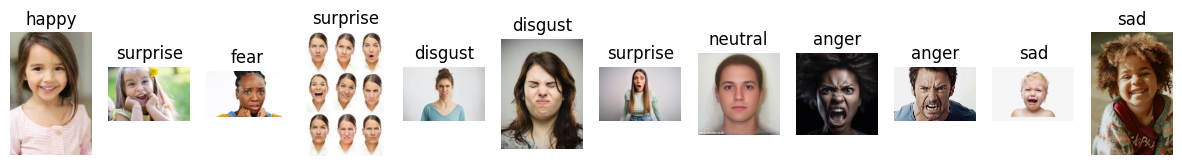

In [6]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import warnings
from datasets import Dataset as HFDataset, Image as HFImage, ClassLabel
from transformers import (
    TrainingArguments,
    Trainer,
    ViTImageProcessor,
    ViTForImageClassification,
    DefaultDataCollator,
    pipeline
)
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import (
    CenterCrop,
    Compose,
    Normalize,
    RandomRotation,
    RandomResizedCrop,
    RandomHorizontalFlip,
    RandomAdjustSharpness,
    Resize,
    ToTensor
)
from PIL import ImageFile, Image
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    f1_score
)
import itertools
import evaluate
from google.colab import files

warnings.filterwarnings("ignore")

ImageFile.LOAD_TRUNCATED_IMAGES = True

# Define the pre-trained ViT model string
model_str = "google/vit-base-patch16-224-in21k"

# Define the list of unique labels
labels_list = ['anger', 'sad', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'surprise']

# Initialize dictionaries to map labels to IDs and vice versa
label2id, id2label = dict(), dict()
for i, label in enumerate(labels_list):
    label2id[label] = i
    id2label[i] = label

# Define the transformations for validation data
image_mean, image_std = [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]
size = 224
normalize = Normalize(mean=image_mean, std=image_std)
_val_transforms = Compose(
    [
        Resize((size, size)),  # Resize images to the ViT model's input size
        ToTensor(),  # Convert images to tensors
        normalize  # Normalize images using mean and std
    ]
)

# Load the saved model and processor
model = ViTForImageClassification.from_pretrained("/content/facial_emotions_image_detection")
processor = ViTImageProcessor.from_pretrained(model_str)  # Use the same processor

# Create the pipeline
pipe = pipeline('image-classification', model=model, feature_extractor=processor, device=0)

# Upload the images
uploaded = files.upload()

# Predict and display each image
fig, axes = plt.subplots(1, len(uploaded), figsize=(15, 5))
if len(uploaded) == 1:
    axes = [axes]  # Ensure axes is iterable if only one image is uploaded

for i, (unseen_image_path, data) in enumerate(uploaded.items()):
    unseen_image = Image.open(unseen_image_path).convert("RGB")
    unseen_image_transformed = _val_transforms(unseen_image).unsqueeze(0)

    # Move the input tensor to the GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    unseen_image_transformed = unseen_image_transformed.to(device)

    # Predict the label for the unseen image
    model.eval()
    with torch.no_grad():
        outputs = model(unseen_image_transformed)
        predicted_label = outputs.logits.argmax(-1).item()

    # Print the predicted label
    print(f"Predicted label for {unseen_image_path}: {id2label[predicted_label]}")

    # Display the image and predicted label using matplotlib
    axes[i].imshow(unseen_image)
    axes[i].set_title(f"{id2label[predicted_label]}")
    axes[i].axis('off')

plt.show()
